In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [3]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [7]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=0e4a2ea39cbe9e9fe689fb58fd7fc759c608eeee27671afef8491cbcbe4307fc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Train the logistic regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=[str(cls) for cls in y_train.unique()],
                                                   mode='classification')

# Define function to predict using the logistic regression model
predict_fn = lambda x: logreg_classifier.predict_proba(x)

# Select an observation from the validation set for which you want to explain predictions
observation_idx = 0  # Change this index according to your choice

# Explain the prediction for the selected observation
exp = explainer.explain_instance(X_val.values[observation_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Actual Value: 0
Predicted Class: 0


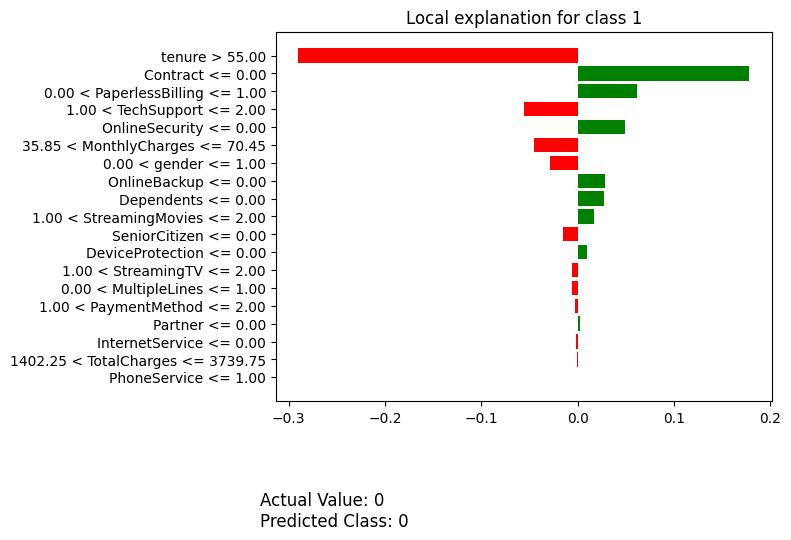

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train the logistic regression classifier
lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=y_train.unique(),
                                                   mode='classification')

# Define function to predict using the logistic regression model
predict_fn = lambda x: lr_classifier.predict_proba(x)

# Select an instance for which you want to explain predictions
# For example, let's say the instance is the first instance in the validation set
instance_idx = 0  # Change this index according to your choice

# Get the actual and predicted values for the selected instance
actual_value = y_val.iloc[instance_idx]
predicted_value = lr_classifier.predict(X_val.values[[instance_idx]]).squeeze()

# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_val.values[instance_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
fig = exp.as_pyplot_figure()

# Save the plot along with actual and predicted values in a PDF file
with PdfPages('explanation_plot_classification_logistic_regression.pdf') as pdf:
    pdf.savefig(fig)
    plt.text(0.1, -0.15, f"Actual Value: {actual_value}\nPredicted Class: {predicted_value}", transform=fig.transFigure, fontsize=12)

# Print actual and predicted values
print("Actual Value:", actual_value)
print("Predicted Class:", predicted_value)
